In [2]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

print("Import Succesfull")

Import Succesfull


In [3]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Tomato/DelhiTomato_31Aug.xlsx")

In [4]:
df.head()

,Unnamed: 0,Date,DELHI_RetailPrice,DELHI_Volume,DieselPrice
0,0,2015-01-01,3285.0,15850.0,53.74
1,1,2015-02-01,3135.0,15178.0,51.96
2,2,2015-03-01,2913.0,14104.0,55.41
3,3,2015-04-01,3283.0,13692.0,52.56
4,4,2015-05-01,3772.0,9535.0,58.19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         67 non-null     int64         
 1   Date               67 non-null     datetime64[ns]
 2   DELHI_RetailPrice  67 non-null     float64       
 3   DELHI_Volume       67 non-null     float64       
 4   DieselPrice        67 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.7 KB


In [6]:
df.describe()

,Unnamed: 0,DELHI_RetailPrice,DELHI_Volume,DieselPrice
count,67.000000,67.000000,67.000000,67.000000
mean,33.000000,3481.190476,11882.682540,61.314545
std,19.485037,1240.773706,2195.506312,7.724340
min,0.000000,1593.000000,6101.000000,47.700000
25%,16.500000,2700.000000,10668.000000,55.330000
50%,33.000000,3285.000000,11882.682540,60.710000
75%,49.500000,4088.000000,13494.000000,68.155000
max,66.000000,7192.000000,16108.000000,77.170000


#  Prediction Models

# 1. Auto ARIMA
# ARIMA Autoregressive integrated moving average its a kind of Grid Search start_p = is the Autoregressieve Part, start_d = is the integrated mart \n, start_i = is the movng avaerage part

adf stands for Augmented Dickey-Fuller unit root test. It is used to check whther the data is stationary or not.

In [7]:
pip install pmdarima

In [8]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df2=df.set_index(datetime_index)

# we don't need the column anymore
df2.drop('Date',axis=1,inplace=True)

print(df2.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [9]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 3.7MB/s 


In [10]:
from pmdarima.arima import auto_arima

In [11]:
import statsmodels.api as sm
import pyramid as pm

In [12]:
columns = ['DELHI_RetailPrice']
df2 = df2[columns]
df2.head()

,DELHI_RetailPrice
2015-01-01,3285.0
2015-02-01,3135.0
2015-03-01,2913.0
2015-04-01,3283.0
2015-05-01,3772.0


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(df2, 
                                      model='additive', 
                                      freq=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

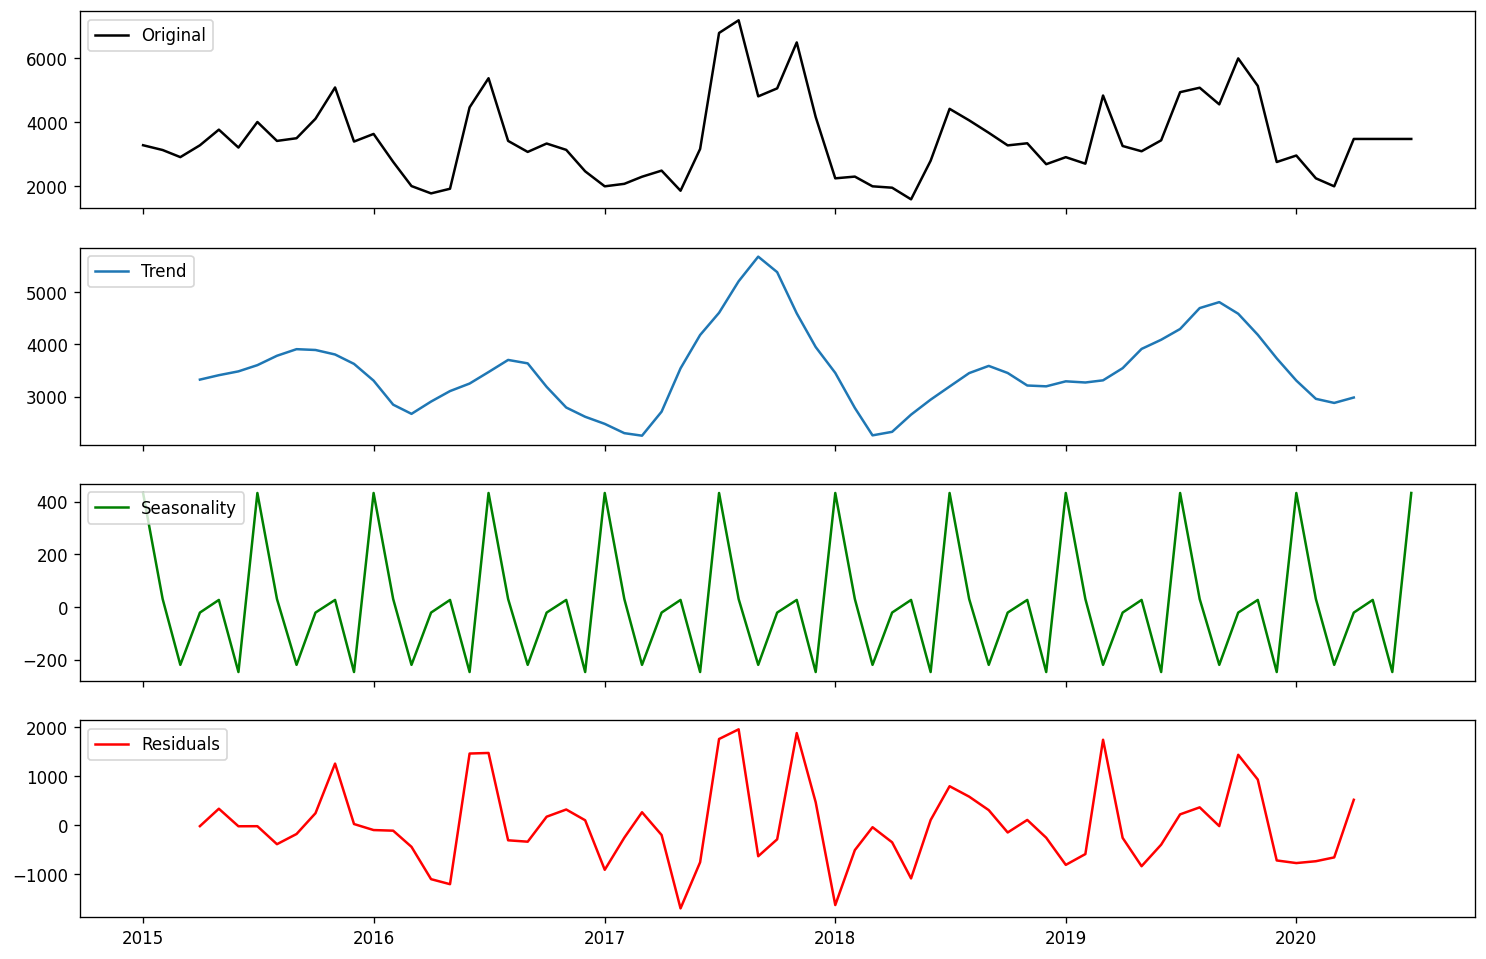

In [14]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df2, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

In [17]:
#divide into train and validation set
train = df2[:int(0.75*(len(df2)))]
test = df2[int(0.75*(len(df2))):]

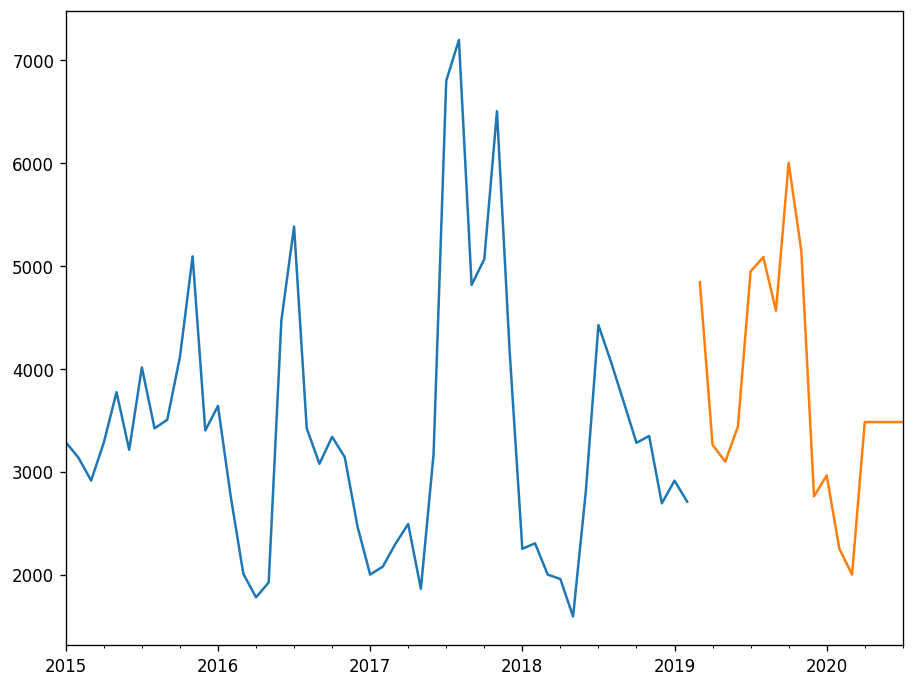

In [18]:
#plotting the data
train['DELHI_RetailPrice'].plot()
test['DELHI_RetailPrice'].plot()

In [19]:
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df2['DELHI_RetailPrice'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=965.771, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=926.673, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=963.791, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=943.441, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=928.591, Time=1.07 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=926.687, Time=1.00 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.77 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=942.414, Time=0.28 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=926.215, Time=0.54 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=944.472, Time=0.05 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=928.192, Time=1.26 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=926.48

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -456.755
Date:                            Sun, 13 Sep 2020   AIC                            923.509
Time:                                    05:31:04   BIC                            933.546
Sample:                                         0   HQIC                           927.390
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     49.9683    391.894      0.128      0.899    -718.130     818.067
ma.L1          0.5276      0.130      4.068      0.000       0.273       0.782
ar.S.L12      -0.9760      0.108     -9.053      0.000      -1.187      -0.765
ma.S.L12       0.8319      0.384      2.168      0.030       0.080       1.584
sigma2      8.414e+05   2.39e+05      3.526      0.000    3.74e+05    1.31e+06
===================================================================================
Ljung-Box (Q):                       51.63   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.10   Prob(JB):                         0.27
Heteroskedasticity (H):               1.31   Skew:                             0.51
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['DELHI_RetailPrice'],  
                order = (0, 1, 0),  
                seasonal_order =(1, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  DELHI_RetailPrice   No. Observations:                   50
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -311.361
Date:                            Sun, 13 Sep 2020   AIC                            626.722
Time:                                    05:32:01   BIC                            629.944
Sample:                                01-01-2015   HQIC                           627.858
                                     - 02-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6033      0.157     -3.853      0.000      -0.910      -0.296
sigma2      1.107e+06   2.28e+05      4.856      0.000     6.6e+05    1.55e+06
===================================================================================
Ljung-Box (Q):                       54.30   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.03   Prob(JB):                         0.33
Heteroskedasticity (H):               0.34   Skew:                             0.47
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

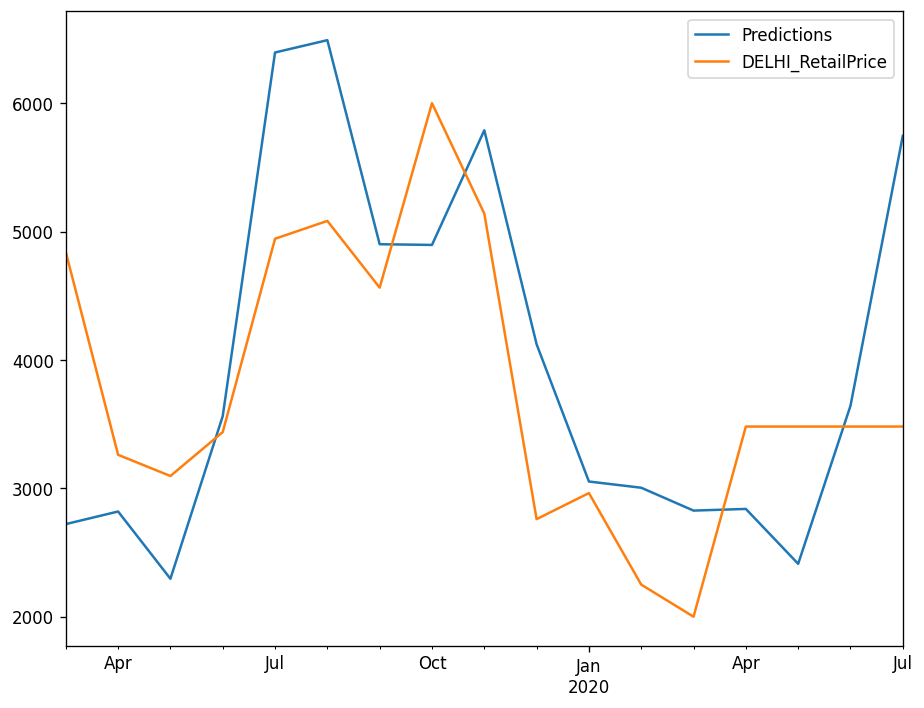

In [22]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['DELHI_RetailPrice'].plot(legend = True) 

In [23]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["DELHI_RetailPrice"], predictions)

1111.6120385678025

In [24]:
# Calculate mean squared error 
mean_squared_error(test["DELHI_RetailPrice"], predictions) 

1235681.3242888656

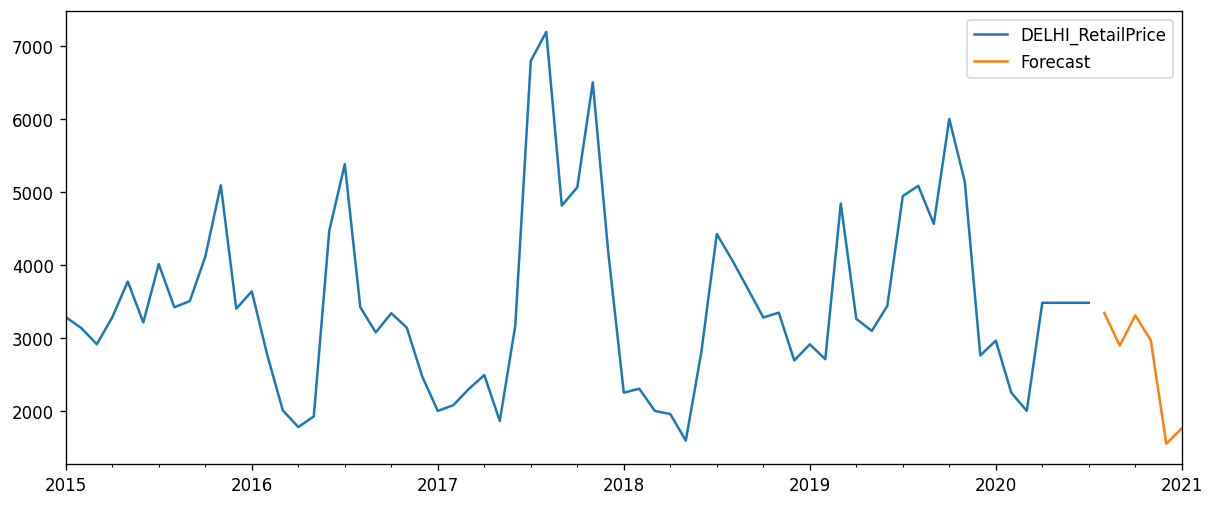

In [25]:
# Train the model on the full dataset 
model = model = SARIMAX(df2['DELHI_RetailPrice'],  
                        order = (0, 1, 0),  
                        seasonal_order =(1, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 6 months
forecast = result.predict(start = len(df2),  
                          end = (len(df2)-1) + 1 * 6,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df2['DELHI_RetailPrice'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [26]:
# forecast for 6 months
forecast.round(1)

2020-08-01    3341.6
2020-09-01    2894.7
2020-10-01    3309.3
2020-11-01    2966.4
2020-12-01    1550.1
2021-01-01    1762.6
Freq: MS, Name: Forecast, dtype: float64

# 2. VAR - Vector auto regression model

In [27]:
from statsmodels.tsa.api import VAR

In [28]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [29]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df3=df.set_index(datetime_index)

# we don't need the column anymore
df3.drop('Date',axis=1,inplace=True)

print(df3.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [30]:
col = ['DELHI_RetailPrice','DELHI_Volume','DieselPrice']
df3 = df3[col]
df3.head()

,DELHI_RetailPrice,DELHI_Volume,DieselPrice
2015-01-01,3285.0,15850.0,53.74
2015-02-01,3135.0,15178.0,51.96
2015-03-01,2913.0,14104.0,55.41
2015-04-01,3283.0,13692.0,52.56
2015-05-01,3772.0,9535.0,58.19


In [31]:
#divide into train and validation set
train1 = df3[:int(0.75*(len(df)))]
test1 = df3[int(0.75*(len(df))):]
print(train1.shape)
print(test1.shape)

(50, 3)
(17, 3)


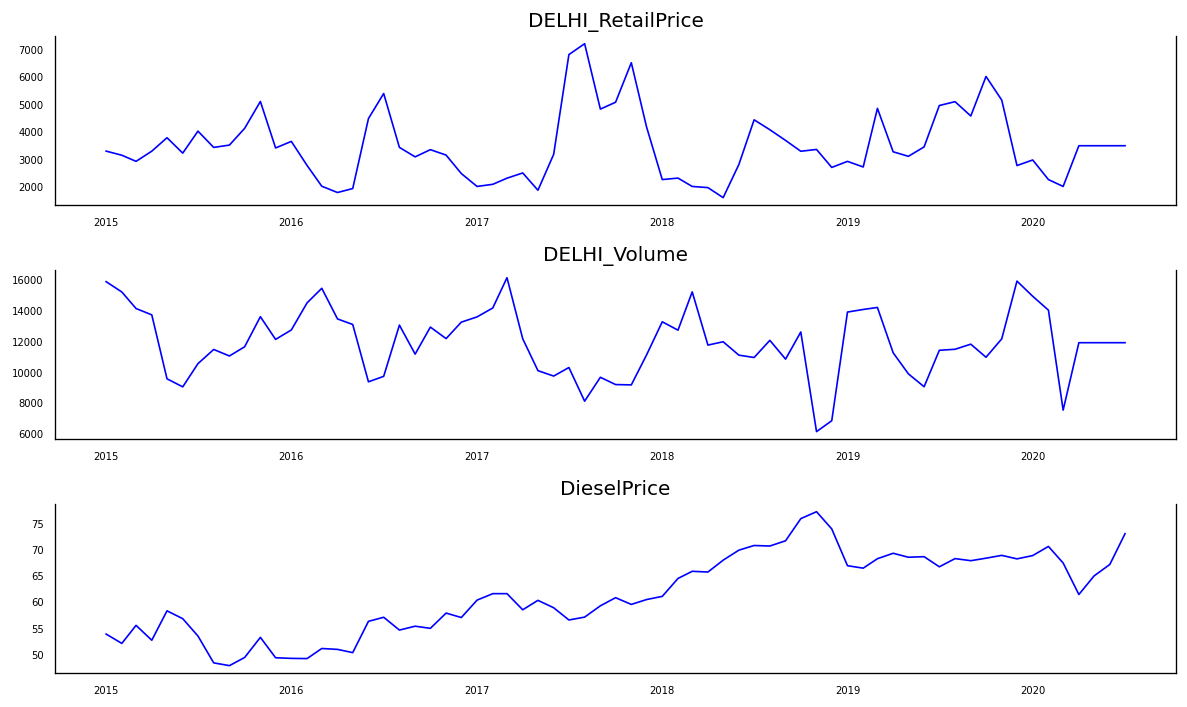

In [32]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df3[df3.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df3.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing Causation using Granger’s Causality Test

In [34]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(df3, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(df3[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df3, variables = df3.columns)   

,DELHI_RetailPrice_x,DELHI_Volume_x,DieselPrice_x
DELHI_RetailPrice_y,1.0000,0.0140,0.1208
DELHI_Volume_y,0.1466,1.0000,0.2293
DieselPrice_y,0.0368,0.0001,1.0000


# Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

In [35]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df3, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df3,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df3.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
DELHI_RetailPrice ::  29.73     > 24.2761   =>   True
DELHI_Volume ::  2.31      > 12.3212   =>   False
DieselPrice ::  0.28      > 4.1296    =>   False


# Check for Stationarity and Make the Time Series Stationary in VAR

# There is a suite of tests called unit-root tests. The popular ones are:

1.Augmented Dickey-Fuller Test (ADF Test)
2.KPSS test
3.Philip-Perron test

In [36]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [37]:
# ADF Test on each column
for name, column in train1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DELHI_RetailPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2454
 No. Lags Chosen       = 4
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0006. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DELHI_Volume" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0325
 No. Lags Chosen       = 0
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0012. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DieselPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationa

In [38]:
# 1st difference
df_differenced = train1.diff().dropna()

# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [39]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DELHI_RetailPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.2258
 No. Lags Chosen       = 1
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DELHI_Volume" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.6628
 No. Lags Chosen       = 10
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = 0.0047. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DieselPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

# All Data is stationary after 1 differencing 

In [41]:
# How to Select the Order (P) of VAR model

modelVAR = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11]:
    result = modelVAR.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  33.10760878817956
BIC :  33.57998689925447
FPE :  239325829176056.56
HQIC:  33.28536784469257 

Lag Order = 2
AIC :  32.634510337608546
BIC :  33.469324888179656
FPE :  150000187738662.66
HQIC:  32.94723687167092 

Lag Order = 3
AIC :  32.09040918254258
BIC :  33.29485084238946
FPE :  88412211965608.23
HQIC:  32.53941294027714 

Lag Order = 4
AIC :  32.26194167718344
BIC :  33.84338248906553
FPE :  108352031645848.47
HQIC:  32.84841616898459 

Lag Order = 5
AIC :  32.364172534138426
BIC :  34.33016336095915
FPE :  127191651053393.48
HQIC:  33.08916919165775 

Lag Order = 6
AIC :  32.472265339841485
BIC :  34.830531250368914
FPE :  156506486179798.9
HQIC:  33.33666306692738 

Lag Order = 7
AIC :  32.1885207410568
BIC :  34.946953824044215
FPE :  138944513736072.67
HQIC:  33.192989984218485 

Lag Order = 8
AIC :  31.90474890756617
BIC :  35.0713978840298
FPE :  137378377446296.86
HQIC:  33.049709186178305 

Lag Order = 9
AIC :  31.788970161428793
BIC :  35.3720260146

# alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method

In [42]:
x = modelVAR.select_order(maxlags=11)
x.summary()

,AIC,BIC,FPE,HQIC
0,33.17,33.30,2.533e+14,33.21
1,33.13,33.65,2.450e+14,33.31
2,32.55,33.46,1.386e+14,32.87
3,32.09,33.40,9.045e+13,32.56
4,32.30,34.00,1.173e+14,32.90
5,32.41,34.50,1.431e+14,33.15
6,32.13,34.61,1.247e+14,33.01
7,31.99,34.86,1.342e+14,33.00
8,30.61,33.88,4.710e+13,31.76
9,29.98,33.64,4.230e+13,31.27


# The selected order(p) 11 is the order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.

# Train the VAR Model of Selected Order(p)

In [43]:
model_fitted = modelVAR.fit(11)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Sep, 2020
Time:                     05:39:14
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    30.5464
Nobs:                     37.0000    HQIC:                   27.6711
Log likelihood:          -538.454    FPE:                1.16251e+13
AIC:                      26.1055    Det(Omega_mle):     1.64523e+12
--------------------------------------------------------------------
Results for equation DELHI_RetailPrice
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                       -25.493065       180.409541           -0.141           0.888
L1.DELHI_RetailPrice         -0.730222         0.651628           -1.121           0.262
L1.DELHI_Volume 

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [44]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df3.columns, out):
    print((col), ':', round(val, 2))

DELHI_RetailPrice : 1.5
DELHI_Volume : 1.62
DieselPrice : 2.87


In [45]:
# forecast
n_obs =12
X_train,X_test = df3[0:-n_obs],df3[-n_obs:]

In [46]:
print(X_train.shape)
print(X_test.shape)

(55, 3)
(12, 3)


In [47]:
X_train_log = np.log(X_train)
X_train_log_diff =(X_train_log).diff().dropna()
X_train_log_diff.describe()

,DELHI_RetailPrice,DELHI_Volume,DieselPrice
count,54.000000,54.000000,54.000000
mean,0.007571,-0.006121,0.003979
std,0.299174,0.200864,0.043454
min,-0.616266,-0.723656,-0.101268
25%,-0.160446,-0.085561,-0.019815
50%,-0.000906,0.003460,0.005652
75%,0.115875,0.106981,0.027644
max,0.842758,0.711331,0.112745


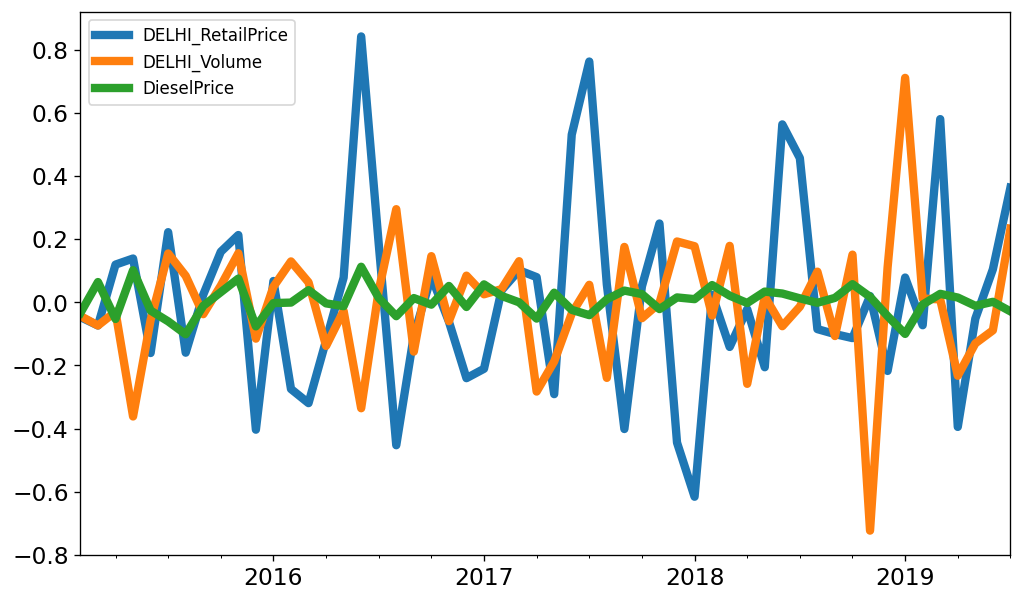

In [48]:
X_train_log_diff.plot(figsize=(10,6),linewidth=5,fontsize=14)
plt.show()

# auto correleation function analysis of transformed series

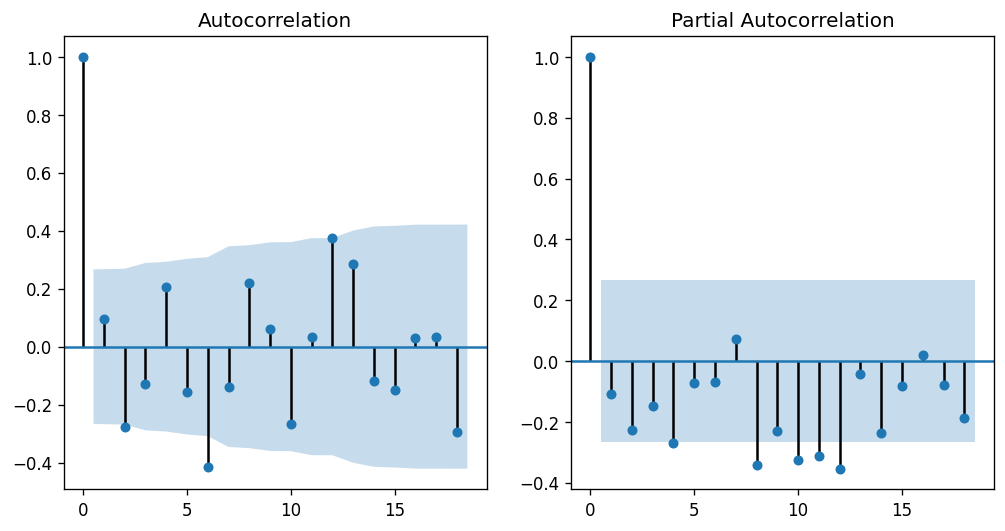

In [50]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) 
ax[0] = plot_acf(X_train_log_diff['DELHI_RetailPrice'], ax=ax[0])
ax[1] = plot_pacf(X_train_log_diff['DELHI_Volume'], ax=ax[1])

In [51]:
mod = VAR(X_train)
res = mod.fit(maxlags=6, ic='aic')
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Sep, 2020
Time:                     05:41:14
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    31.5152
Nobs:                     53.0000    HQIC:                   31.0348
Log likelihood:          -1019.08    FPE:                2.23805e+13
AIC:                      30.7346    Det(Omega_mle):     1.54257e+13
--------------------------------------------------------------------
Results for equation DELHI_RetailPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     7031.573169      2185.794358            3.217           0.001
L1.DELHI_RetailPrice         0.630041         0.145851            4.320           0.000
L1.DELHI_Volume     

In [52]:
# Get the lag order
lag_order = res.k_ar
print(lag_order)
# Input data for forecasting
input_data = X_train.values[-lag_order:]
print(input_data)
# forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred.round())

2
[[ 3438.    9020.      68.56]
 [ 4944.   11389.      66.62]]
            DELHI_RetailPrice_pred  DELHI_Volume_pred  DieselPrice_pred
2019-08-01                  4560.0            11131.0              66.0
2019-09-01                  3546.0            10737.0              67.0
2019-10-01                  3134.0            11017.0              67.0
2019-11-01                  3259.0            11353.0              67.0
2019-12-01                  3422.0            11378.0              66.0
2020-01-01                  3445.0            11260.0              66.0
2020-02-01                  3413.0            11204.0              66.0
2020-03-01                  3406.0            11223.0              66.0
2020-04-01                  3419.0            11250.0              66.0
2020-05-01                  3426.0            11258.0              66.0
2020-06-01                  3424.0            11257.0              66.0
2020-07-01                  3422.0            11261.0              66.0


In [55]:
# Calculate root mean squared error 
rmse(X_test, pred).round(2) 

array([1192.93, 2210.34,    3.1 ])

# RMSE for Delhi Retail price is 1192, delhi Volume is 2210.3 and for Diesel Price is 3.1